In [9]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [10]:
X, Y = make_blobs(n_samples=300,centers = 3,cluster_std = 0.50,random_state = 15)

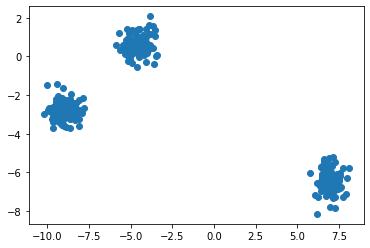

In [11]:
plt.scatter(X[:,0], X[:,1])

In [12]:
TWCSS = []
clusters = []

for k in range(1, 20):
    WCSS = []

    centeroids = np.zeros((k, np.shape(X)[1]))

    for i in range(k):
        centeroids[i,:] = X[np.random.randint(np.shape(X)[0]),:]

    for iter in range(100):
        classyfications = []
        d = {}

        for i in range(k):
            d[i] = []
        
        for data in X:
            distance = []

            for i in range(k):
                distance.append(sum((data - centeroids[i,:])**2)**0.5)

            idx = distance.index(min(distance))
            d[idx].append(data)
            classyfications.append(idx)
        
        for i in range(k):
            centeroids[i,:] = np.average(d[i], axis = 0)
            try:
                WCSS.append(np.linalg.norm(centeroids[i,:] - d[i]))
            except:
                pass
    
    TWCSS.append(sum(WCSS))
    clusters.append(k)

In [13]:
print(TWCSS)
print(clusters)
print(clusters[TWCSS.index(min(TWCSS))])
k = clusters[TWCSS.index(min(TWCSS))]

[12674.139748413487, 4766.789017598315, 2171.9653435845084, 2242.3380788027125, 2261.145265754493, 2241.8514428250865, 2255.8408536130205, 2364.8401635675377, 2312.9874387616396, 2357.234091784733, 2382.373247402632, 2309.43407269023, 2376.54026754994, 2380.931394993232, 2385.682168039062, 2404.042391893797, 2432.620845603393, 2411.497487758478, 2415.948423032484]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
3


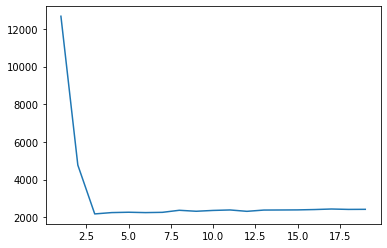

In [14]:
plt.plot(clusters, TWCSS)

In [15]:
centeroids = np.zeros((k, np.shape(X)[1]))

for i in range(k):
    centeroids[i,:] = X[np.random.randint(np.shape(X)[0]),:]

for iter in range(100):
    classyfications = []
    d = {}

    for i in range(k):
        d[i] = []
        
    for data in X:
        distance = []

        for i in range(k):
            distance.append(sum((data - centeroids[i,:])**2)**0.5)

        idx = distance.index(min(distance))
        d[idx].append(data)
        classyfications.append(idx)
        
    for i in range(k):
        centeroids[i,:] = np.average(d[i], axis = 0)

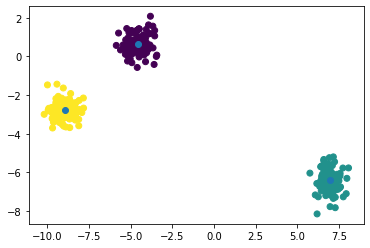

In [16]:
plt.scatter(X[:,0], X[:,1], c = classyfications)

plt.scatter(centeroids[:,0], centeroids[:,1])